## Question 1
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [2]:
# your answer here
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
# Create the contingency table

observed = np.array([
    [32, 12],  # Low activity: Yes drinks, No drinks
    [14, 22],  # Medium activity: Yes drinks, No drinks
    [6, 9]     # High activity: Yes drinks, No drinks
])

In [6]:
# Create a pandas DataFrame for better visualization
activity_levels = ['Low', 'Medium', 'High']
drink_consumption = ['Yes', 'No']
df = pd.DataFrame(observed, index=activity_levels, columns=drink_consumption)
df['Total'] = df.sum(axis=1)
df.loc['Total'] = df.sum(axis=0)

print("Contingency Table:")
print(df)
print("\n")

Contingency Table:
        Yes  No  Total
Low      32  12     44
Medium   14  22     36
High      6   9     15
Total    52  43     95




In [7]:
# Calculate the chi-square statistic, p-value, degrees of freedom, and expected frequencies
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [8]:
# Create a DataFrame for expected frequencies
expected_df = pd.DataFrame(expected, index=activity_levels, columns=drink_consumption)
print("Expected Frequencies:")
print(expected_df)
print("\n")

Expected Frequencies:
              Yes         No
Low     24.084211  19.915789
Medium  19.705263  16.294737
High     8.210526   6.789474




In [9]:
# Calculate the chi-square contribution of each cell
contribution = (observed - expected)**2 / expected
contribution_df = pd.DataFrame(contribution, index=activity_levels, columns=drink_consumption)
print("Chi-Square Contribution by Cell:")
print(contribution_df)
print("\n")

Chi-Square Contribution by Cell:
             Yes        No
Low     2.601693  3.146233
Medium  1.651844  1.997579
High    0.595142  0.719706




In [10]:
# Calculate the row percentages
row_percentages = df.iloc[:-1, :2].div(df.iloc[:-1, 2], axis=0) * 100
row_percentages_df = pd.DataFrame(row_percentages, index=activity_levels, columns=drink_consumption)
print("Row Percentages (% within each activity level):")
print(row_percentages_df)
print("\n")

Row Percentages (% within each activity level):
              Yes         No
Low     72.727273  27.272727
Medium  38.888889  61.111111
High    40.000000  60.000000




In [11]:
# Print the results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Critical Value at 5% significance level: 5.991")

Chi-Square Statistic: 10.7122
P-value: 0.0047
Degrees of Freedom: 2
Critical Value at 5% significance level: 5.991


In [12]:
# Make a decision based on the p-value
alpha = 0.05
if p < alpha:
    decision = "Reject"
else:
    decision = "Fail to reject"

print(f"Decision: {decision} the null hypothesis")
print(f"Conclusion: There {'is' if p < alpha else 'is not'} a significant association between physical activity levels and sugary drink consumption at a 5% significance level.")


Decision: Reject the null hypothesis
Conclusion: There is a significant association between physical activity levels and sugary drink consumption at a 5% significance level.


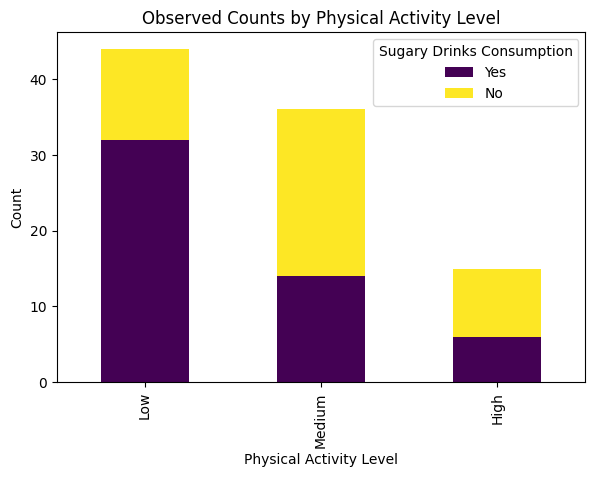

In [17]:
# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Stacked bar chart of counts
plt.subplot(2, 2, 1)
df.iloc[:-1, :2].plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Observed Counts by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Sugary Drinks Consumption')

## [OPTIONAL] Question 2
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf). 
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

In [ ]:
# your answer here